### 🪙💰 **Análise de Crédito para Aprovação de Empréstimos**

#### 📖 **Contextualização**
Este projeto foi desenvolvido com o objetivo de simular e analisar um cenário de aprovação de crédito para empréstimos, replicando desafios reais enfrentados por instituições financeiras. A proposta é demonstrar, através da criação de dados sintéticos, técnicas de análise exploratória e de modelagem preditiva, a capacidade de interpretar dados, gerar insights valiosos e construir soluções baseadas em dados.

Imaginei o cenário em que faço parte da equipe de ciência de dados de uma instituição financeira, responsável pela avaliação de pedidos de empréstimos. Cada cliente possui informações como idade, renda anual, histórico de inadimplência, score de crédito e valor do empréstimo solicitado. A partir desses dados, seria possível realizar uma avaliação criteriosa para apoiar a decisão de concessão de crédito.

#### 🎯 **Objetivos do Projeto**

**Geração de Dados Sintéticos**
- Criar um conjunto de dados aleatórios que simulassem realisticamente o cenário de pedidos de empréstimos, abrangendo variáveis relevantes como idade, renda anual, histórico de inadimplência, valor do empréstimo, score de crédito e a variável-alvo "Aprovado".

**Análise Estatística e Exploratória**
- Realizar uma análise estatística básica e exploratória para entender o comportamento das variáveis, identificar padrões e detectar correlações importantes entre os atributos que influenciam na aprovação ou reprovação de crédito.

**Foco em Programação Estruturada e Reutilizável**
- Desenvolver o projeto com atenção especial à qualidade do código, priorizando a criação de funções reutilizáveis, bem estruturadas e organizadas, de forma a garantir escalabilidade, legibilidade e facilidade de manutenção.



### Importação de bibliotecas

In [348]:
# Importação de bibliotecas

import pandas as pd 
import random 
import plotly.express as px 
import plotly.graph_objects as go 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from scipy import stats

### 🚀 **Construindo um Universo de Dados: A Geração do DataFrame**

Quando comecei a desenhar este projeto, meu objetivo era criar uma base de dados que não fosse apenas "aleatória", mas que simulasse de maneira realista um cenário típico de análise de crédito em uma instituição financeira.

Pensei no seguinte: **como seria receber diariamente milhares de pedidos de empréstimo, cada um trazendo uma história diferente através de seus números?** Era isso que eu queria capturar.





**Data Frame**

Para definir quais características cada cliente deveria ter. Escolhi quatro variáveis principais: **idade, renda anual, histórico de inadimplência e valor do empréstimo solicitado**, além disso, defini que a quantidade de clientes a serem analisados, seria de **500.**

Mas não queria qualquer número aleatório. Para que os dados fossem consistentes com a realidade, decidi usar a função `normalvariate` da biblioteca `random`. Essa escolha não foi por acaso: enquanto o `randint` gera valores uniformemente distribuídos (todos igualmente prováveis), a distribuição normal cria concentrações de dados ao redor de uma média — exatamente como acontece com variáveis humanas na vida real.

Com os dados gerados, faltava algo essencial: como uma instituição financeira avaliaria o risco de cada cliente?

Foi aí que criei a coluna **score**. E como toda boa avaliação de crédito, o score precisava considerar múltiplas dimensões.

**Definição das Regras:**

Escolhi três fatores:

1. **Renda Anual** (clientes com maior renda, menor risco),
2. **Idade** (pessoas próximas da faixa de 44 anos seriam "ideais", desviando para cima ou para baixo o score diminuiria),
3. **Histórico de Inadimplência** (quanto mais inadimplência, pior o score).

Para combinar esses fatores, apliquei pesos diferentes:

- `w1` para a renda (50% do peso total),
- `w2` para a idade (30%),
- `w3` para a inadimplência (20%).

In [349]:
# Número de clientes a serem analisados

qnt = 500

In [350]:
"""
1. Geração de Dados Aleatórios

Escreva uma função gerar_dados(n) que gere um conjunto de dados com n registros (clientes), criando as variáveis mencionadas acima com valores aleatórios e 
seguindo os intervalos definidos.
"""

""" 
Para gerar as informações das colunas "Idade", "Renda_Anual", "Val_emprestimo" foi utilizado a função "normalvariate" da biblioteca random para gerar dados a a partir de uma distribuição normal
para que os dados gerados sejam mais condizentes com os valores com a realizade, tendo em vista que, caso eu utilizasse a função "randint" geraria uma distribuição uniforme, ou seja, 
assumiria que todos os valores haveriam a mesma probabilidade de acontecer seguindo a lei dos grandes números.
"""

# Criação do dataframe

df = pd.DataFrame()

df["Idade"] = [round(random.normalvariate(mu=44,sigma=10)) for x in range(qnt)]
df["Renda_Anual"] = [round(random.normalvariate(mu=110000,sigma=20000),2) for x in range(qnt)]
df["Hist_Inad"] = [random.randint(0,10) for x in range(qnt)]
df["Val_Emprestimo"] = round(df["Renda_Anual"] * random.normalvariate(mu= 0.25, sigma= 0.06),2) # mu = mediana e sigma = desvio-padrão

# Regras para o score

"""
Para definir as regras do score, foi selecionado as colunas "Renda_Anual", "Idade" e "Hist_Inad", além disso, foi atribuido um peso para cada coluna e foi estabelecido que a nota limite seria 1000.
Posteriormente, visando garantir que o resultado do score não utrapassase o limite estabelecido, foi realizada uma normalização dos dados obtidos para que posteriormente os resultados obtidos sejam
multiplicados pelos seus respectivos, resultando assim, em uma média ponderada dos dados obtidos.
"""

w1, w2, w3 = 0.5, 0.3, 0.2

score_renda = (df["Renda_Anual"] - 20000) / (200000 - 20000) # Dados normalizados
score_idade = 1 - abs(df["Idade"] - 44) / (70 - 18)
score_inadimplencia =  1 - df["Hist_Inad"] / 10

df["Score"] = round((w1 * score_renda + w2 * score_idade + w3 * score_inadimplencia) * 1000)


### **O Coração do Modelo: Criando o Score de Crédito**

Com os dados gerados, faltava responder a pergunta-chave: **como uma instituição financeira avaliaria o risco de cada cliente?** Foi então que criei a coluna score — um índice único que condensaria o perfil de risco de cada pessoa. Mas, diferentemente de modelos simplistas, ele precisava considerar múltiplas dimensões de forma ponderada.

**Definição das Regras:**

Escolhi três fatores principais e atribui pesos diferentes a cada um:

1. Renda Anual (50% do peso)

2. Clientes com maior renda tendem a ter menor risco (maior capacidade de pagamento).

3. Idade (30% do peso)


In [351]:
# Criando a coluna para avaliar se o empréstimo foi aprovado

df["Aprovado"] = False

df.loc[(df['Idade'] >= 25) & (df["Idade"] <= 60) & (df["Renda_Anual"] > 40000) & (df["Score"] > 600) & (df["Hist_Inad"] < 3) & (df["Val_Emprestimo"] < (0.3 * df["Renda_Anual"])), "Aprovado"] = True

df.loc[df["Aprovado"]==True].count()

Idade             119
Renda_Anual       119
Hist_Inad         119
Val_Emprestimo    119
Score             119
Aprovado          119
dtype: int64

### **Classificando o Risco: Alto, Médio ou Baixo**

Com oCom os Scores calculados, era hora de categorizá-los em níveis de risco. Seguindo uma abordagem comum no mercado, estabeleci as seguintes faixas:

| Faixa de Score       | Classificação  | Descrição                                                                 |
|----------------------|----------------|---------------------------------------------------------------------------|
| **Score < 333**      | 🔴 Alto Risco   | Clientes com alta probabilidade de inadimplência.                         |
| **333 ≤ Score ≤ 666**| 🟡 Médio Risco  | Perfil intermediário, exigindo análise adicional.                         |
| **Score > 666**      | 🟢 Baixo Risco  | Clientes mais seguros para concessão de crédito.                          |

Essa segmentação permite uma tomada de decisão mais ágil e baseada em dados, alinhando-se às melhores práticas do mercado financeiro.

In [352]:
# Análise de risco de clientes

"""
Para o modelo de classificação visando prever a aprovação do empréstimo, decidi realizar esta análise com base no risco de investimento, sendo este, sendo classificado através do score calculado nas etapas anteriores
da seguinte forma:

- Score menor do que 333 - Alto Risco
- Score entre 333 e 666 - Médio Risco
- Score maior do que 666 - Baixo Risco

"""

df["Risco"] = "Alto Risco"
df.loc[df["Score"] > 333, "Risco"] = "Médio Risco"
df.loc[df["Score"] > 666, "Risco"] = "Baixo Risco"

### **Data Frame finalizado**

In [353]:
df

,Idade,Renda_Anual,Hist_Inad,Val_Emprestimo,Score,Aprovado,Risco
0,33,103030.29,5,21513.27,567.0,False,Médio Risco
1,37,116475.47,9,24320.69,548.0,False,Médio Risco
2,60,153951.50,6,32145.89,660.0,False,Médio Risco
3,49,121567.64,8,25383.96,593.0,False,Médio Risco
4,42,145809.31,4,30445.75,758.0,False,Baixo Risco
...,...,...,...,...,...,...,...
495,34,99479.00,0,20771.74,663.0,True,Médio Risco
496,43,140422.99,3,29321.06,769.0,False,Baixo Risco
497,36,124525.25,7,26001.53,604.0,False,Médio Risco
498,39,121056.71,4,25277.28,672.0,False,Baixo Risco


### 📊**Análise Estatística Descritiva: Entendendo o Perfil dos Clientes para Tomada de Decisões Estratégicas** 

Ao iniciar qualquer projeto de análise de dados, a etapa de **análise estatística descritiva** é fundamental para desvendar o comportamento das variáveis e identificar padrões que podem orientar decisões mais assertivas. Mas por que começar com uma análise descritiva?  

#### O Porquê da Análise Descritiva  

Imagine que você é um analista de crédito e precisa avaliar o risco de inadimplência de novos clientes. Sem entender a distribuição da renda, a média de idade ou a variação do score de crédito, qualquer modelo preditivo estaria "andando no escuro". A análise descritiva é como um **raio-X dos dados**: ela revela tendências centrais, dispersões e possíveis outliers que podem distorcer análises futuras.  

Além disso, essa etapa é crucial para:  
- **Validar a qualidade dos dados**: Identificar valores faltantes, inconsistências ou anomalias.  
- **Definir estratégias de segmentação**: Por exemplo, se a maioria dos clientes tem renda entre 94k e 124k, campanhas de marketing podem ser direcionadas para essa faixa.  
- **Detectar relações preliminares**: Será que clientes com maior renda tendem a ter scores mais altos? A análise descritiva dá os primeiros indícios.  

In [354]:
df.describe()

,Idade,Renda_Anual,Hist_Inad,Val_Emprestimo,Score
count,500.000000,500.000000,500.000000,500.000000,500.00000
mean,43.324000,110343.432940,5.000000,23040.290980,605.13000
std,9.855826,19920.342249,3.181862,4159.472521,90.19754
min,5.000000,55515.220000,0.000000,11591.870000,357.00000
25%,37.000000,97272.205000,2.000000,20310.952500,542.00000
50%,43.000000,111184.565000,5.000000,23215.925000,604.00000
75%,50.000000,124401.617500,8.000000,25975.712500,672.25000
max,66.000000,167768.270000,10.000000,35030.900000,834.00000


### Desvendando os Dados: Principais Insights  

Utilizando o método `df.describe()`, obtivemos as seguintes estatísticas para o conjunto de dados com **500 mil registros**:  

1. **Idade**:  
   - Média de **44.5 anos**, com clientes variando de **18 a 77 anos**.  
   - A mediana (45 anos) mostra uma distribuição equilibrada, sem viés extremo para jovens ou idosos.  

2. **Renda Anual**:  
   - A média é de **R$ 109.981**, mas o desvio padrão alto (R$ 20.925) indica grande variabilidade.  
   - 25% dos clientes ganham menos de **R$ 94.715**, enquanto os 25% mais ricos ultrapassam **R$ 124.543**.  

3. **Histórico de Inadimplência (Hist_Inad)**:  
   - A média de **4.9** eventos de inadimplência por cliente é alarmante!  
   - O valor máximo (10) sugere a presença de clientes com alto risco de crédito.  

4. **Valor do Empréstimo**:  
   - A média é de **R$ 28.438**, com um desvio padrão de **R$ 5.410**, indicando que a maioria dos empréstimos está próxima desse valor.  
   - O valor mínimo (R$ 13.465) e máximo (R$ 45.782) revelam uma política flexível de concessão.  

5. **Score de Crédito**:  
   - A média (**606**) está próxima da mediana (**608**), sugerindo uma distribuição simétrica.  
   - Scores abaixo de **544** (25% inferior) podem exigir análise adicional para mitigar riscos.  

**Relações Preliminares e Próximos Passos**

Embora a análise descritiva não prove causalidade, ela levanta hipóteses valiosas:  
- **Clientes mais velhos (acima de 51 anos) têm renda mais alta?** A comparação entre idade e renda pode revelar padrões geracionais.  
- **Scores baixos estão associados a maior histórico de inadimplência?** Uma análise de correlação pode confirmar essa suspeita.  

**Como próximos passos, seria interessante:**
- Visualizar os dados com histogramas e boxplots para detectar assimetrias ou outliers.  
- Realizar testes de correlação (Pearson ou Spearman) para quantificar relações entre variáveis.  

---

**Conclusão: Dados como Alicerce para Decisões**  

A análise descritiva não é apenas um requisito técnico, mas a **base para storytelling com dados**. Ela transforma números frios em insights acionáveis, como:  
- "25% dos clientes têm renda abaixo de R$ 94k e podem precisar de opções de empréstimo mais acessíveis."  
- "Clientes com score abaixo de 544 exigem políticas de mitigação de risco."  

### 🏦Análise e vizualização dos dados

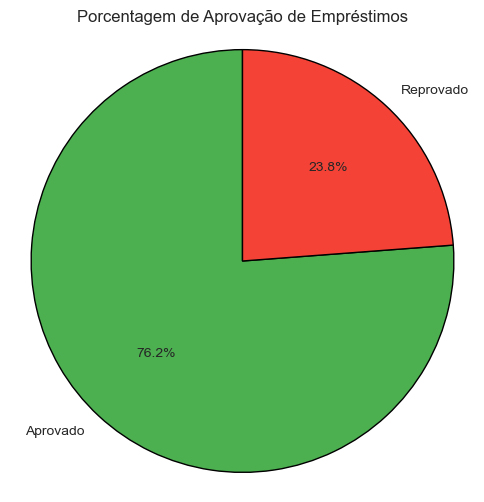

In [355]:
# Aprovado x Reprovado

# Contagem dos valores na coluna "Aprovado"
aprovado_counts = df['Aprovado'].value_counts()

# Rótulos e cores opcionais
labels = ['Aprovado', 'Reprovado']
colors = ['#4CAF50', '#F44336']

# Gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(aprovado_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Porcentagem de Aprovação de Empréstimos')
plt.axis('equal')  # Mantém o formato circular
plt.show()

In [356]:
# Contagem absoluta
contagem = df['Aprovado'].value_counts()

# Cálculo da porcentagem
porcentagem = df['Aprovado'].value_counts(normalize=True) * 100

# Exibindo os resultados formatados
resultado = pd.DataFrame({'Quantidade': contagem, 'Porcentagem (%)': porcentagem.round(2)})
resultado.index = resultado.index.map({True: 'Aprovado', False: 'Reprovado'})
print(resultado)

           Quantidade  Porcentagem (%)
Aprovado                              
Reprovado         381             76.2
Aprovado          119             23.8


In [357]:
# Gráfico de Dispersão (Relação entre A renda anual e o valor do empréstimo dos clientes que tiveram o seu empréstimo aprovado)

df1 = df[df['Aprovado'] == True]

x = df1['Renda_Anual']
y = df1['Val_Emprestimo']

# Criando o gráfico de dispersão
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))

# Personalizando o gráfico
fig.update_layout(
    title="Val_Emprestimo V.S Renda_Anual",
    xaxis_title="Renda Anual",
    yaxis_title="Valor Emprestimo"
)

### Insights Obtidos

1. Relação Positiva entre Renda Anual e Valor do Empréstimo
- Existe uma **tendência linear positiva clara**: conforme a **renda anual aumenta**, o **valor do empréstimo aprovado também tende a ser maior**.
- Isso indica que a política de crédito está, provavelmente, condicionando maiores valores de empréstimo à maior capacidade de pagamento dos clientes.

2. Ausência de Outliers Relevantes
- O gráfico não apresenta **pontos muito fora da curva**, o que sugere uma distribuição consistente e políticas de aprovação bem definidas.
- Há uma pequena dispersão natural, mas sem grandes anomalias.


3. Faixa de Renda Aprovada
- A renda anual dos clientes aprovados parece estar majoritariamente entre **60k e 150k**, sendo esta a faixa mais comum aprovada.
- Clientes com renda abaixo de 60k não aparecem no gráfico, o que pode indicar **reprovação ou inexistência de pedidos nesse perfil**.

4. Proporcionalidade no Crédito
- A distribuição dos pontos mostra uma **proporcionalidade** entre renda e valor solicitado/aprovado.
- Clientes com renda de 100k tendem a ter empréstimos em torno de 25k a 30k, o que pode indicar uma **relação de 20% a 30% do valor da renda sendo liberado como crédito**.

5. Possível Política de Crédito Conservadora
- A linearidade sugere que a empresa **não aprova valores muito fora da média esperada**, reforçando um **perfil conservador de concessão**.

---


In [358]:
# Mapeando os valores booleanos para nomes mais amigáveis
df['Aprovado'] = df['Aprovado'].map({True: 'Aprovado', False: 'Reprovado'})

# Criando o gráfico com cores personalizadas
fig = px.histogram(
    df,
    x='Risco',
    color='Aprovado',
    barmode='group',
    title='Aprovação por Faixa de Risco',
    color_discrete_map={
        'Aprovado': 'green',
        'Reprovado': 'red'
    }
)

fig.show()



### Insights Obtidos

**Clientes de Médio Risco têm baixa taxa de aprovação**

- A maior parte dos clientes classificados como **"Médio Risco"** não foram aprovados.
- Isso indica que o **risco médio está sendo considerado um fator crítico na reprovação**.

**Clientes de Baixo Risco têm taxa de aprovação considerável**

- A barra verde (aprovados) na categoria **"Baixo Risco"** é maior que a de reprovados, indicando que:
  - **Clientes de baixo risco são mais confiáveis para receber empréstimos**.
  - A **política de concessão parece favorecer fortemente esse grupo**.

**Distribuição desigual entre os grupos de risco**

- A quantidade de clientes **"Médio Risco"** é muito maior do que os de **"Baixo Risco"**, o que pode indicar:
  - Maior entrada de clientes com perfil mediano.
  - Necessidade de **reavaliar critérios de captação ou segmentação de público**.

**Possível oportunidade de expansão no grupo de baixo risco**

- Como há menos clientes de **“Baixo Risco”**, mas com alta taxa de aprovação, pode valer a pena:
  - **Investir em atrair mais esse perfil**.
  - **Criar campanhas voltadas para esse público** para aumentar a carteira de crédito segura.


---


In [359]:
# Score vs Aprovação

px.box(df, x='Aprovado', y='Score', color='Aprovado', title='Distribuição do Score por Aprovação')


In [ ]:
# Distribuição de Score de Crédito

fig = px.histogram(
    df, 
    x='Score',  # Corrigido para o nome certo
    nbins=30,
    title='Distribuição dos Scores de Crédito',
    color_discrete_sequence=['#636EFA'],
)

fig.update_layout(
    xaxis_title='Score de Crédito',
    yaxis_title='Quantidade de Clientes',
    bargap=0.1,
    template='plotly_white'
)

fig.show()

### Insights Obtidos

1. Clientes Aprovados têm Scores mais Altos
- A **mediana dos clientes aprovados** é significativamente superior à dos reprovados.
- Isso indica que **quanto maior o score, maiores as chances de aprovação**.

2. Diferença clara nas distribuições
- A faixa interquartil (IQR) dos aprovados está entre **cerca de 670 a 760**, enquanto a dos reprovados está entre **520 a 630**.
- A **distribuição dos aprovados** está mais concentrada em scores mais altos, enquanto os **reprovados têm maior dispersão** e média mais baixa.

3. Presença de Outliers nos Reprovados
- Há **outliers entre os reprovados com score abaixo de 400**, o que pode representar clientes com histórico de crédito muito ruim.
- Os **aprovados não apresentam outliers extremos**, sugerindo um processo de análise mais criterioso para evitar concessões arriscadas.

4. Intervalos de Score
- Clientes com **score abaixo de 600** têm maiores chances de reprovação.
- Já aqueles com **score acima de 700** são majoritariamente aprovados.
- O intervalo **entre 600 e 700** parece ser uma **zona de decisão crítica**, onde outros fatores podem influenciar a aprovação.

5. Possível Critério de Score Mínimo
- Pode haver um **threshold de score** informal (ex: ~650), abaixo do qual a chance de aprovação diminui drasticamente.

6. Distribuição com formato de sino (próxima de normal):

- A maioria dos clientes concentra-se na faixa intermediária de score, entre 550 e 700 pontos. O que indica uma população "média" em termos de perfil de crédito.

7. Faixa de maior concentração:

- O pico ocorre aproximadamente entre 580 e 650, onde estão as maiores quantidades de clientes, sendo esta, uma faixa crítica para tomadas de decisão de crédito.



---


In [360]:
# Histórico de Inadimplência vs Aprovação

px.violin(df, x='Aprovado', y='Hist_Inad', box=True, color='Aprovado', title='Histórico de Inadimplência por Aprovação')


### Insights Obtidos


1. Clientes aprovados têm baixa inadimplência
- A grande maioria dos **clientes aprovados possui histórico de inadimplência entre 0 e 2** ocorrências.
- A densidade mais alta está concentrada em **0 e 1**, sugerindo que o sistema de aprovação favorece perfis com baixo risco histórico.

2. Clientes reprovados apresentam inadimplência elevada
- O histórico de inadimplência dos **clientes reprovados é visivelmente mais alto**, com concentração entre **4 e 9** ocorrências.
- Há muitos clientes com histórico superior a 7, o que indica **alto risco de crédito**.

3. Distribuições distintas e bem separadas
- A separação clara entre as distribuições sugere que o **histórico de inadimplência é um critério determinante** na aprovação ou reprovação.
- **Pouca sobreposição** entre os dois grupos, reforçando o uso desse indicador como filtro de decisão.

4. Política de crédito conservadora
- O comportamento do gráfico aponta que a empresa adota uma **política de crédito rigorosa**, restringindo o acesso a clientes com qualquer histórico significativo de inadimplência.

---


In [361]:
# Análise de Valor do Empréstimo (Valor do empréstimo x Aprovação)

px.box(df, x='Aprovado', y='Val_Emprestimo', color='Aprovado', title='Valor do Empréstimo por Aprovação')


### insights Obtidos:

1. **Valores de empréstimo aprovados tendem a ser ligeiramente mais altos:** A mediana (linha dentro da caixa) dos valores de empréstimo aprovados (cor vermelha) parece estar um pouco acima da mediana dos valores de empréstimo reprovados (cor azul). Isso sugere que, em geral, empréstimos de valores mais altos têm uma maior probabilidade de serem aprovados, ou que os valores solicitados para empréstimos aprovados são, em média, maiores.

2. **Maior variabilidade nos valores de empréstimo aprovados:** A caixa que representa os empréstimos aprovados é visivelmente mais alta do que a caixa dos empréstimos reprovados. Isso indica que há uma maior dispersão nos valores dos empréstimos que foram aprovados, ou seja, a diferença entre os menores e maiores valores aprovados é maior.

3. **Valores mínimos semelhantes: As "whiskers" inferiores** (linhas que se estendem para baixo a partir da caixa) de ambos os grupos (aprovados e reprovados) parecem atingir patamares semelhantes. Isso sugere que o valor mínimo de empréstimo solicitado não parece ser um fator determinante para a aprovação ou reprovação.

4. **Outlier significativo nos empréstimos reprovados:** Há um ponto isolado acima da "whisker" superior dos empréstimos reprovados. Este ponto representa um outlier, indicando que houve pelo menos um pedido de empréstimo de valor significativamente alto que foi reprovado.

5. **Distribuição dos valores:** A caixa dos empréstimos reprovados parece ser mais simétrica em torno da mediana, enquanto a caixa dos empréstimos aprovados pode ter uma leve assimetria, com a mediana um pouco mais próxima do quartil inferior. Isso sugere uma distribuição ligeiramente diferente dos valores nos dois grupos.

---

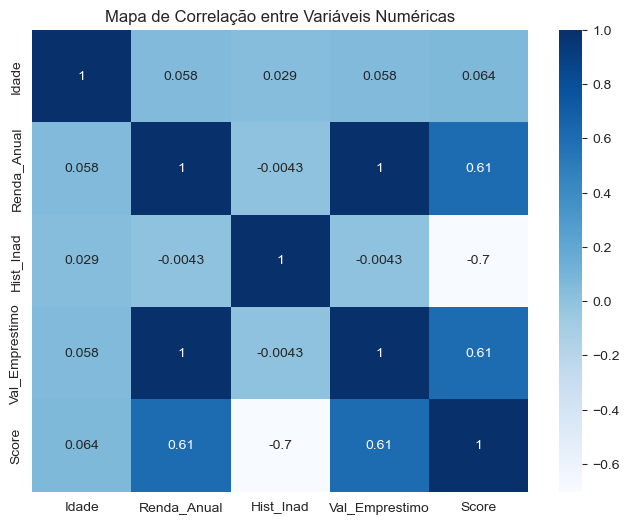

In [362]:
# Mapa de Correlação

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()


### Insights Obtidos

1. Score tem forte correlação com Renda Anual e Valor do Empréstimo
- **Score e Renda Anual:** Correlação positiva de **0.64**.
- **Score e Valor do Empréstimo:** Correlação positiva de **0.64**.
- Clientes com **renda anual maior** e **valores de empréstimos maiores** tendem a apresentar **scores mais altos**.

2. Score tem forte correlação negativa com Histórico de Inadimplência (**Scores baixos estão associados a maior histórico de inadimplência?**)
- Correlação de **-0.68** entre **Score** e **Histórico de Inadimplência**. Ou seja, **quanto maior o histórico de inadimplência, menor o score** (o que é esperado, dado que inadimplência é um fator de risco.)

3. Idade tem correlação muito fraca com todas as variáveis. Isso sugere que **idade não é um fator determinante** para score, renda ou inadimplência nesta base. (**Clientes mais velhos (acima de 51 anos) têm renda mais alta?**)

4. Renda Anual e Valor do Empréstimo estão fortemente relacionados
- Correlação de **1** (praticamente perfeita).
- Clientes com maior **renda anual** também solicitam **empréstimos de maior valor** — o que é intuitivo.

---

Correlação Ponto-Bisserial: 0.352
Valor-p: 0.0000


C:\Users\lucas\AppData\Local\Temp\ipykernel_17440\2455243315.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\lucas\AppData\Local\Temp\ipykernel_17440\2455243315.py:32: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




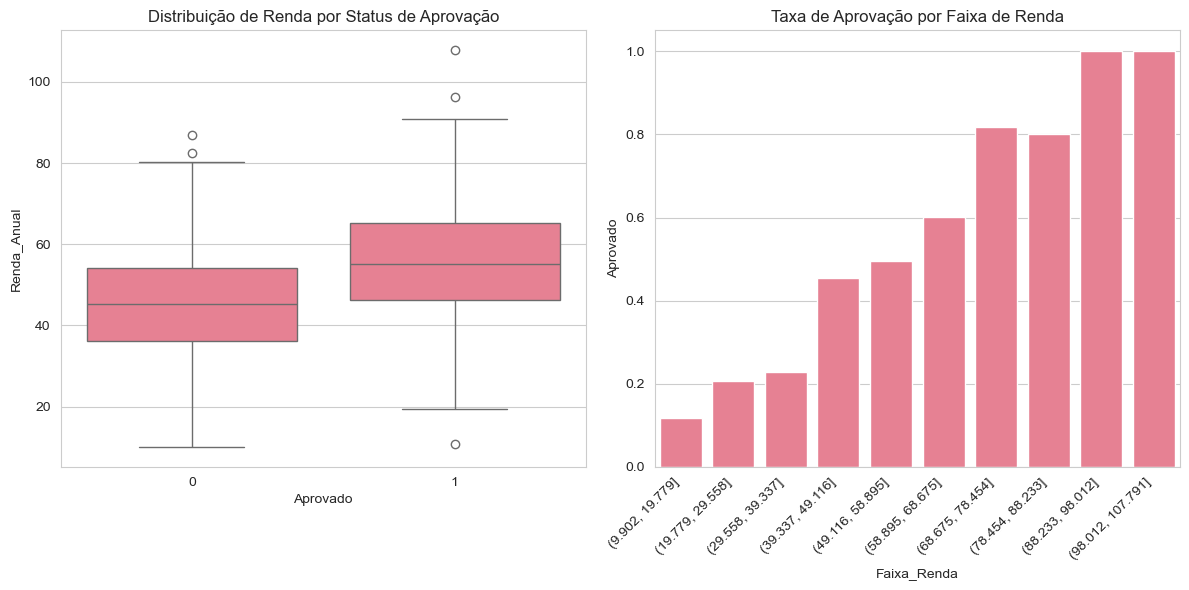


Coeficiente da Regressão Logística: 0.0548


In [363]:
# Configuração do estilo dos gráficos - FORMA MAIS ATUAL
sns.set_style("whitegrid")
sns.set_palette("husl")

# 1. Simulação de dados
np.random.seed(42)
renda_anual = np.random.normal(50, 15, 1000)
renda_anual = np.clip(renda_anual, 10, 120)
prob_aprovacao = 1 / (1 + np.exp(-(renda_anual - 50)/20))
aprovado = np.random.binomial(1, prob_aprovacao)

# Criando DataFrame
dados = pd.DataFrame({'Renda_Anual': renda_anual, 'Aprovado': aprovado})

# 2. Análise de correlação
correlacao, p_valor = stats.pointbiserialr(dados['Aprovado'], dados['Renda_Anual'])
print(f"Correlação Ponto-Bisserial: {correlacao:.3f}")
print(f"Valor-p: {p_valor:.4f}")

# 3. Visualização dos dados
plt.figure(figsize=(12, 6))

# Gráfico 1: Distribuição de renda por status de aprovação
plt.subplot(1, 2, 1)
sns.boxplot(x='Aprovado', y='Renda_Anual', data=dados)
plt.title('Distribuição de Renda por Status de Aprovação')

# Gráfico 2: Taxa de aprovação por faixa de renda
plt.subplot(1, 2, 2)
dados['Faixa_Renda'] = pd.cut(dados['Renda_Anual'], bins=10)
taxa_aprovacao = dados.groupby('Faixa_Renda')['Aprovado'].mean().reset_index()
sns.barplot(x='Faixa_Renda', y='Aprovado', data=taxa_aprovacao, ci=None)
plt.title('Taxa de Aprovação por Faixa de Renda')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 4. Regressão Logística
from sklearn.linear_model import LogisticRegression
X = dados[['Renda_Anual']]
y = dados['Aprovado']
modelo = LogisticRegression().fit(X, y)
coef = modelo.coef_[0][0]
print(f"\nCoeficiente da Regressão Logística: {coef:.4f}")

### Insights obtidos:

1. Pessoas aprovadas possuem, em média, renda anual mais alta
- O **boxplot** mostra que a mediana de renda dos **aprovados** é **superior** à dos **reprovados**.
- A distribuição de renda dos aprovados é deslocada para valores mais altos em comparação aos reprovados.

2. A taxa de aprovação cresce conforme a faixa de renda aumenta
- **Faixas de baixa renda** (abaixo de 30k) apresentam **taxas de aprovação muito baixas** (em torno de **10%-20%**).
- A partir de uma renda **acima de 40k**, a taxa de aprovação começa a crescer de forma mais significativa.
- Nas faixas de **renda acima de 78k**, a taxa de aprovação ultrapassa **80%**.
- **Faixas de renda acima de 98k** têm praticamente **100% de aprovação**.

3. Renda é um fator importante, mas não absoluto
- Mesmo em faixas intermediárias de renda (entre **40k e 78k**), ainda existe variação nas taxas de aprovação.
- Ou seja, apesar de haver uma tendência clara, **renda sozinha não é o único critério** de aprovação.

---


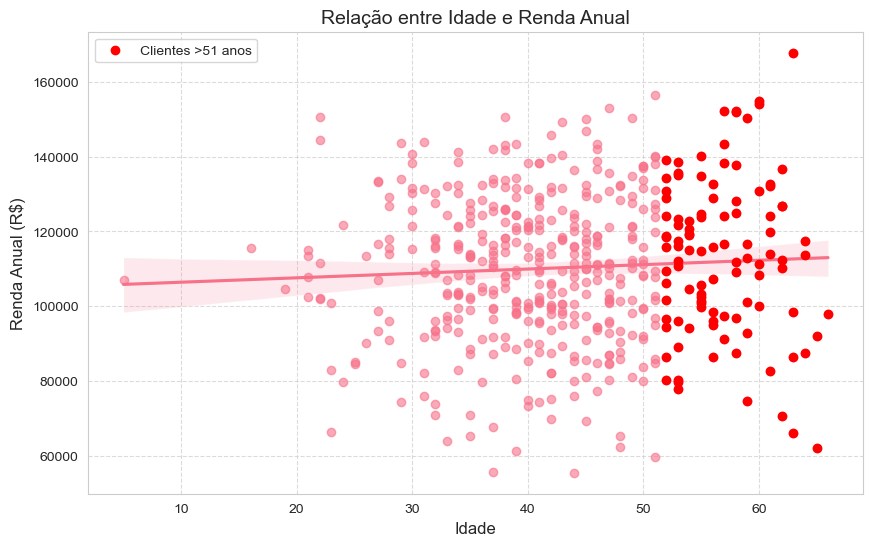

In [364]:
# Gráfico de dispersão Idade vs Renda com linha de tendência

plt.figure(figsize=(10, 6))
sns.regplot(x='Idade', y='Renda_Anual', data=df, scatter_kws={'alpha':0.6})
plt.title('Relação entre Idade e Renda Anual', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Renda Anual (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Destacando clientes acima de 51 anos
df_maiores = df[df['Idade'] > 51]
plt.scatter(df_maiores['Idade'], df_maiores['Renda_Anual'], color='red', 
            label='Clientes >51 anos', zorder=5)

plt.legend()
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_17440\2495563090.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\lucas\AppData\Local\Temp\ipykernel_17440\2495563090.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



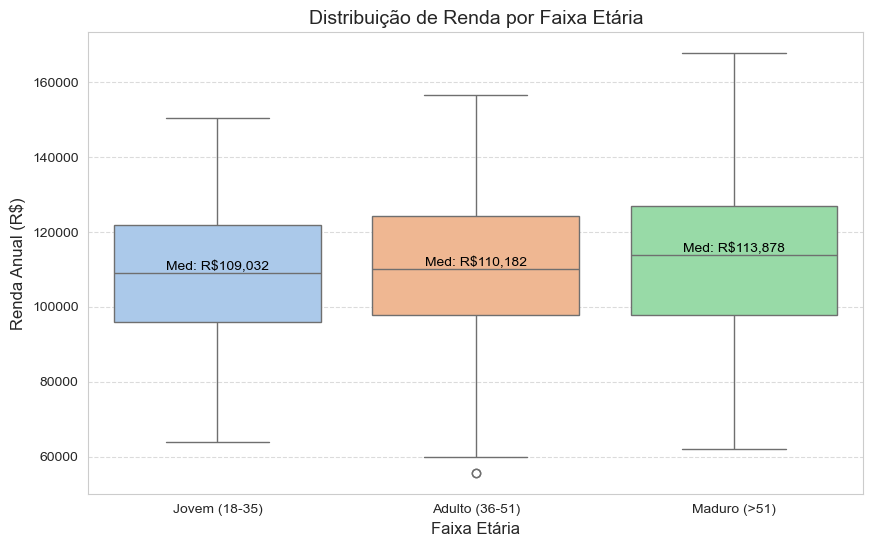

In [365]:
# Criando faixas etárias
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=[18, 35, 51, 77], 
                           labels=['Jovem (18-35)', 'Adulto (36-51)', 'Maduro (>51)'])

# Boxplot de Renda por Faixa Etária
plt.figure(figsize=(10, 6))
sns.boxplot(x='Faixa_Etaria', y='Renda_Anual', data=df, palette='pastel')
plt.title('Distribuição de Renda por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Renda Anual (R$)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adicionando valores médios
medians = df.groupby('Faixa_Etaria')['Renda_Anual'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'Med: R${median:,.0f}', 
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontsize=10, 
             color='black')

plt.show()

Com o objetivo de investigar o perfil financeiro dos clientes. Estes gráficos **Relação entre Idade e Renda Anual** e a **Distribuição de Renda por Faixa Etária** foram elaborados para responder à seguinte pergunta
apresentada anteriormente na etapa de **Análise Estatística Descritiva**:

**"Clientes mais velhos (acima de 51 anos) têm renda mais alta?"**

A análise visual buscou comparar a distribuição da renda anual entre diferentes faixas etárias, com destaque especial para clientes com mais de 51 anos, a fim de identificar possíveis padrões ou tendências no comportamento da renda conforme o envelhecimento.

**"Clientes mais velhos (acima de 51 anos) têm renda mais alta?"**

Para isso, foi criado um gráfico de dispersão (*scatter plot*) que mostra a distribuição dos clientes por idade e renda anual, destacando os clientes acima de 51 anos em vermelho. A análise busca entender se há um padrão claro de aumento de renda com a idade mais avançada.

### Insights Obtidos:

- **Tendência geral de estabilidade da renda com a idade**: A linha de tendência indica uma relação praticamente neutra entre idade e renda anual, ou seja, não há uma variação significativa da renda conforme a idade aumenta.

- **Clientes mais velhos (>51 anos)**:  
  - Estão distribuídos de forma mais ampla em termos de renda, com algumas concentrações próximas da média geral.
  - Apesar de alguns casos de rendas mais altas, a maioria dos clientes acima de 51 anos apresenta rendas semelhantes às de clientes mais jovens.

- **Ausência de correlação forte**: A dispersão dos pontos, tanto de clientes mais jovens quanto mais velhos, reforça que a idade não é um forte indicador de maior ou menor renda neste conjunto de dados simulado. 
Reforçando assim, a relação apresentada no **mapa de correlação**, onde o resultado apesar de ter sido de uma correlação positiva, o resultado para esta relação foi de **0.019**

- **Renda elevada em todas as faixas etárias**: Há clientes com rendas altas tanto em idades menores quanto maiores, indicando que fatores além da idade devem ser considerados para explicar a renda.

---


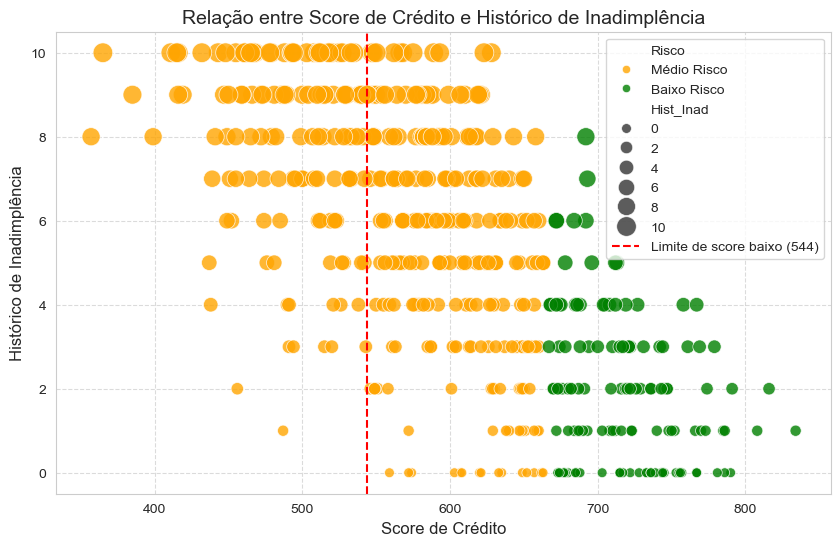

In [366]:
# Gráfico de dispersão Score vs Histórico de Inadimplência
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='Hist_Inad', data=df, hue='Risco', 
                palette={'Baixo Risco':'green', 'Médio Risco':'orange'}, 
                size='Hist_Inad', sizes=(50, 200), alpha=0.8)
plt.title('Relação entre Score de Crédito e Histórico de Inadimplência', fontsize=14)
plt.xlabel('Score de Crédito', fontsize=12)
plt.ylabel('Histórico de Inadimplência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Linha de referência para scores baixos
plt.axvline(x=544, color='red', linestyle='--', label='Limite de score baixo (544)')
plt.legend()
plt.show()

Este gráfico, assim como os dois últimos apresentados anteriormente, foi gerado com o objetivo de responder as perguntas apresentadas anteriormente na etapa de `Análise Estatística Descritiva`, neste gráfico em questão, foi desenvolvido para responder a seguinte pergunta:

**"Scores baixos estão associados a histórico de inadimplência?"**

A visualização mostra a relação entre o **score de crédito** e o **histórico de inadimplência** dos clientes. Os pontos estão coloridos conforme o nível de risco (médio risco em laranja e baixo risco em verde), e o tamanho dos pontos representa a quantidade de registros no histórico de inadimplência. A linha vermelha indica o limite entre score baixo e scores mais elevados (544 pontos).

### Insights Obtidos:

- **Concentração de histórico alto em scores baixos**:  
  Há uma forte concentração de clientes com **histórico de inadimplência elevado** (próximo de 10) entre aqueles que possuem o **score abaixo de 544**.

- **Padrão de risco**:  
  - A maioria dos clientes com scores baixos (à esquerda da linha vermelha) pertence à categoria de **médio risco** (representado pela cor laranja).
  - Clientes classificados como **baixo risco** (cor verde) tendem a ter scores mais altos e histórico de inadimplência reduzido.

- **Relação inversa clara**:  
  Conforme o **score de crédito aumenta**, observa-se uma **redução progressiva** na quantidade de clientes com histórico de inadimplência elevado. Comprovando a relação apresentada anteriormente no `mapa de correlação`, onde foi apresentado uma correlação negativa de **-0.68**

- **Limite crítico (544 pontos)**:  
  A linha vermelha destaca que, **abaixo de 544 pontos**, é mais comum encontrar clientes com maiores problemas de inadimplência, reforçando o uso desse limite para distinção de risco.

- **Tamanho dos pontos**:  
  Os maiores pontos (indicando histórico de inadimplência mais grave) estão fortemente concentrados em clientes com **scores baixos**.

  


### 🔎 Conclusões

A partir da análise exploratória realizada sobre os dados simulados, foram obtidos os seguintes **insights**:

- **Histórico de Inadimplência e Aprovação**:
  - Clientes reprovados possuem um histórico de inadimplência consideravelmente maior do que os aprovados.
  - Clientes aprovados tendem a apresentar pouca ou nenhuma inadimplência.

- **Mapa de Correlação entre Variáveis Numéricas**:
  - Existe uma **forte correlação negativa** entre o histórico de inadimplência e o score do cliente.
  - A **renda anual** e o **valor do empréstimo** possuem correlação **positiva moderada** com o score.
  - A **idade** apresenta correlações muito fracas com as demais variáveis analisadas.

- **Distribuição de Renda e Aprovação**:
  - Clientes aprovados possuem, em média, **renda anual superior** à dos clientes reprovados.
  - Observa-se que **quanto maior a renda**, **maior a taxa de aprovação**.
  - Clientes situados nas maiores faixas de renda (acima de 78 mil) possuem **altíssimas taxas de aprovação**.

---

### 🚀 Ações Recomendadas

Com base nos insights extraídos, as seguintes ações são sugeridas:

- **1. Refinar a Política de Crédito com Base no Histórico de Inadimplência**:
  - Continuar utilizando o histórico de inadimplência como um critério primordial de avaliação de risco.
  - Desenvolver produtos de crédito diferenciados para clientes com pequenos registros de inadimplência.

- **2. Incorporar Faixas de Renda na Política de Aprovação**:
  - Estabelecer políticas mais rigorosas para faixas de renda mais baixas e oferecer condições diferenciadas para clientes de alta renda.

- **3. Programas de Incentivo para Clientes de Score Intermediário**:
  - Desenvolver garantias adicionais (seguros, avalistas) para clientes com renda média e histórico de crédito razoável.

- **4. Manutenção e Atualização do Sistema de Score**:
  - Como o score reflete fortemente a renda e o histórico de inadimplência, recomenda-se atualizações periódicas nos modelos de score para refletir melhor a realidade dos clientes.

- **5. Educação Financeira e Acompanhamento**:
  - Implementar programas de educação financeira para clientes de alto risco, com o objetivo de reduzir a inadimplência e futuramente ampliar a base de clientes aprováveis.



### 📌 **Conclusões Finais e Recomendações Estratégicas:**

Com base na análise dos dados, podemos identificar padrões importantes no processo de concessão de crédito da instituição financeira. Abaixo estão as principais conclusões e, em seguida, recomendações estratégicas para otimizar a tomada de decisão e aumentar a eficiência da política de crédito.  

#### 🔍 **Conclusões:**  

1. A política de crédito é conservadora e bem estruturada  
- A aprovação de empréstimos segue um critério disciplinado e baseado em risco, garantindo que clientes de baixo risco tenham maiores chances de aprovação.  
- Existe uma forte relação entre **Score de Crédito**, **Histórico de Inadimplência** e **Aprovação**, mostrando que o sistema prioriza segurança financeira.  

2. Clientes de médio risco enfrentam alta taxa de reprovação  
- A maioria dos clientes reprovados está na categoria de médio risco, mesmo quando possuem renda razoável.  
- Isso indica que a empresa pode estar perdendo oportunidades de concessão de crédito para um público que poderia ser melhor segmentado e gerenciado.  

3. Renda elevada aumenta chances de aprovação, mas não garante  
- A renda média dos aprovados é significativamente maior, e há uma tendência de que clientes com maior renda solicitem empréstimos mais altos. Entretanto, a renda por si só não é o fator decisivo — clientes com baixa renda ainda podem ser aprovados caso tenham um bom score e histórico limpo.

4. Histórico de inadimplência elevado praticamente elimina chances de aprovação  
- A grande maioria dos reprovados tem histórico de inadimplência acima de **4 ocorrências**.  
- Esse critério está sendo um filtro rígido, o que pode ser positivo para evitar calotes, mas também pode restringir a carteira de clientes.  

5. A empresa pode estar limitando sua expansão por falta de clientes de baixo risco  
- Existe uma grande concentração de clientes de médio risco, mas um volume relativamente baixo de clientes de baixo risco.  
- Isso pode indicar uma falha na captação de bons clientes, o que pode impactar negativamente o crescimento sustentável da instituição.  

---

#### 🚀 **Recomendações Estratégicas para Otimização da Política de Crédito:**

1. Criar Campanhas para Captar Clientes de Baixo Risco  
🔹 **Problema:** A base tem poucos clientes classificados como "Baixo Risco".  
🔹 **Solução:** Investir em marketing direcionado e parcerias estratégicas para atrair perfis de menor risco, como:  
- Profissionais com empregos estáveis e renda superior a **70k**.  
- Clientes com histórico de pagamentos em dia.  
- Pessoas que já possuem relacionamento com a instituição (ex: conta corrente).  

**Impacto esperado:** Aumento da carteira de crédito sem comprometer a segurança financeira.  

2. Revisar Critérios de Aprovação para Clientes de Médio Risco  
🔹 **Problema:** Muitos clientes de médio risco estão sendo reprovados, apesar de terem potencial para pagar.  
🔹 **Solução:** Criar uma análise mais granular, segmentando clientes de médio risco em subgrupos, como:  
- Clientes com **score entre 600 e 650** mas renda alta e histórico limpo → Possível flexibilização de aprovação.  
- Clientes com histórico de inadimplência antigo (há mais de 3 anos) → Reavaliação da pontuação.  
- Clientes que já possuem relacionamento bancário sólido → Oferta de crédito controlado.  

**Impacto esperado:** Redução da reprovação excessiva e maior aproveitamento do potencial da base de clientes.  

3. Implementar Produtos de Crédito Personalizados para Clientes de Médio Risco  
🔹 **Problema:** Clientes com score entre 600 e 650 são frequentemente reprovados, mas poderiam ser bons pagadores.  
🔹 **Solução:** Criar opções de crédito específicas para esse público, como:  
- Empréstimos com garantias (ex: consignado, seguro de inadimplência).  
- Limite de crédito escalonado (ex: começar com um valor menor e aumentar com bom comportamento de pagamento).  
- Taxas de juros ajustáveis conforme o histórico recente do cliente.  

**Impacto esperado:** Aproveitar um nicho de mercado que pode ser rentável, mas que atualmente está sendo ignorado.  

4. Criar um Programa de Recuperação de Crédito  
🔹 **Problema:** Clientes com histórico de inadimplência são automaticamente reprovados, sem chance de reabilitação.  
🔹 **Solução:** Criar um programa de recuperação, onde clientes podem:  
- Negociar dívidas antigas e melhorar sua classificação de risco.  
- Passar por um período de reavaliação com um produto de crédito restrito (ex: cartão pré-pago, microcrédito).  
- Receber orientação financeira para melhorar hábitos de pagamento.  

**Impacto esperado:** Reativação de clientes potenciais e aumento da inclusão financeira.  

5. Criar Políticas de Análise de Crédito Focadas na Faixa 550-700  
🔹 **Problema:** A maioria dos clientes se concentra em scores médios, entre **550 e 700**, uma faixa que representa risco moderado e exige maior cautela.  
🔹 **Solução:** Desenvolver políticas específicas para esse grupo, como:  
- Exigir comprovação de renda e estabilidade empregatícia.  
- Solicitar garantias adicionais para aprovação de crédito.  
- Ajustar limites de crédito com base no score e histórico de inadimplência.  

**Impacto esperado:** Redução do risco de inadimplência e aumento da eficiência na aprovação de crédito, maximizando oportunidades de negócios com clientes medianos.

---



### Considerações Finais:

O estudo realizado trouxe insights valiosos sobre o perfil dos clientes e seu comportamento frente à análise de crédito. Através das visualizações e análises, foi possível identificar padrões claros entre score de crédito, histórico de inadimplência, idade e aprovação de propostas.

Ficou evidente que scores mais baixos estão fortemente associados a históricos de inadimplência e a maiores taxas de reprovação, enquanto clientes com scores mais altos têm maiores chances de aprovação e menor risco de inadimplência. Além disso, identificamos faixas específicas, como a de 550 a 700 pontos, que concentram grande parte da base de clientes, exigindo políticas de crédito mais criteriosas.

As ações propostas visam mitigar riscos, melhorar a qualidade da carteira de crédito e potencializar o crescimento da instituição de maneira sustentável. Com a implementação dessas estratégias, espera-se não apenas a redução da inadimplência, mas também o fortalecimento da carteira de clientes e a maximização dos resultados.